# Code Tutorial for Influence Maximization: Divide and Conquer

Please cite:

Influence Maximization: Divide and Conquer

Siddharth Patwardhan, Filippo Radicchi, Santo Fortunato

https://arxiv.org/abs/2210.01203

In [1]:
#import all neccesary functions
from main import *

An air transportation network with 500 nodes and 2980 edges is used to show the usage of the various methods introduced in the paper

In [2]:
#get networkx object for visualization and general usage and igraph object for the methods
g=nx.read_edgelist('Data/networks/net_airport.txt',data=False,nodetype=int)
gI=read('Data/networks/net_airport.txt',directed=False)

## Visualization of the network

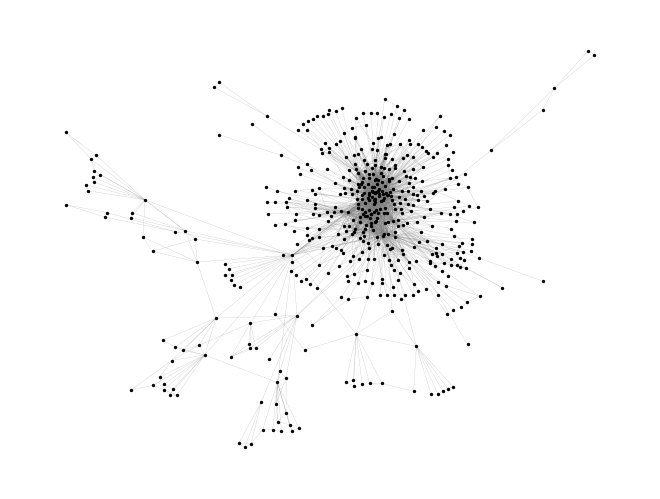

In [3]:
nx.draw(g,node_size=2,node_color='k',edge_color='gray',width=0.1)

# Dividing the Network

## Graph Partitioning

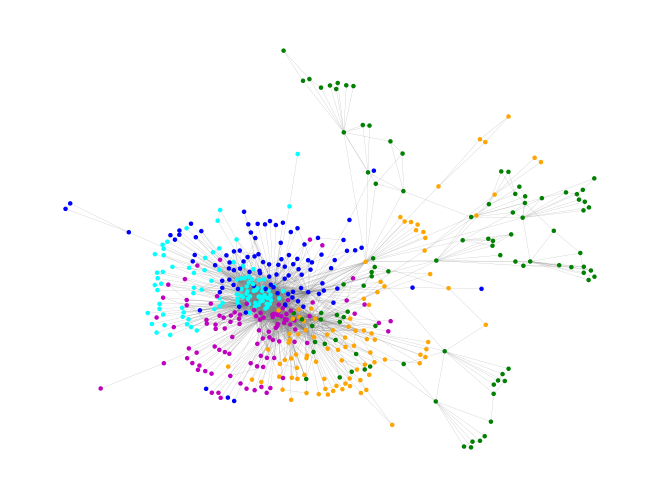

In [4]:
#use metis.part_graph to divide networkx graph object g into k partitions
k=5
_,temp=metis.part_graph(g,k)
#convert to a neat dictionary format
M={h:temp[h]+1 for h in range(g.number_of_nodes())}
#visualize

color_code={5:'b',1:'orange',2:'green',3:'m',4:'cyan'}
colors=[color_code[i] for i in M.values()]
nx.draw(g,node_size=5,node_color=colors,edge_color='gray',width=0.1)

## Community Structure

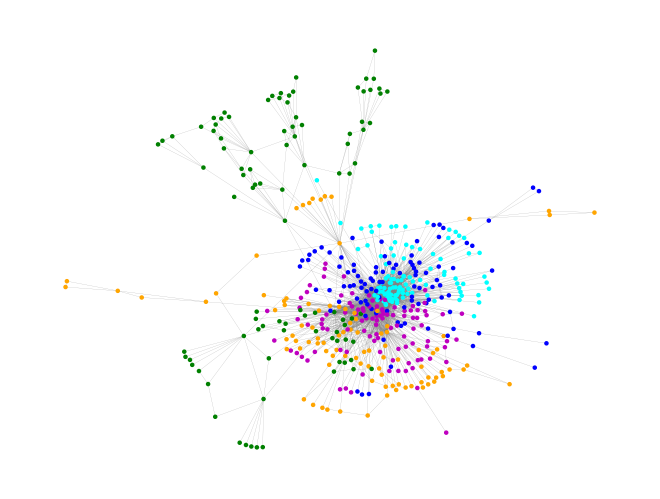

In [5]:
#use community_louvain.best_partition to get communities
C=community_louvain.best_partition(g)
#visualize

color_code={5:'b',1:'orange',2:'green',3:'m',4:'cyan'}
colors=[color_code[i] for i in M.values()]
nx.draw(g,node_size=5,node_color=colors,edge_color='gray',width=0.1)

## Graph Embedding: Mercator

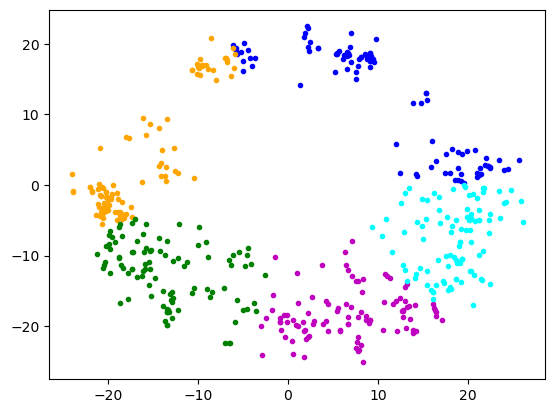

In [42]:
#use Mercator_Local to get hyperbolic embeddings
X=Mercator_Local('net_airport')
X=X[X[:, 1].argsort()]
n=500
k=5
for j in range(5):
    plt.plot([i[2]*np.cos(i[1]) for i in X[int(j*(n/k)):int((j+1)*(n/k))]],[i[2]*np.sin(i[1]) for i in X[int(j*(n/k)):int((j+1)*(n/k))]],'.',c=list(color_code.values())[j])

## Selecting Influential Spreaders: Graph Partitioning

In [6]:
k=10
_,temp=metis.part_graph(g,10)
#convert to a neat dictionary format
M={h:temp[h]+1 for h in range(g.number_of_nodes())}
S=Find_Influential_Spreaders_graph_partition(gI,M,10)
print('Found influencer set: ',S)

Found influencer set:  [100, 37, 78, 0, 110, 18, 181, 96, 36, 125]


## Selecting Influential Spreaders: Community Structure

In [8]:
C=community_louvain.best_partition(g)
S=Find_Influential_Spreaders_community(C,gI,k)
print('Found influencer set: ',S)

Found influencer set:  [100, 6, 93, 36, 108, 133, 37, 62, 171, 125]


## Selecting Influential Spreaders: Mercator

In [9]:
X=Mercator_Local('net_airport')
Find_Influential_Spreaders_mercator(X,gI,k)
print('Found influencer set: ',S)

Found influencer set:  [100, 6, 93, 36, 108, 133, 37, 62, 171, 125]
